In [15]:
execfile('C:\measuring/analysis\scripts\setup_analysis.py')
%matplotlib inline
import scipy.signal


reloaded


In [16]:
import analysis.scripts.cavity.functions_for_processing_linewidth_data as funcs
import analysis.scripts.cavity.combine_cavity_characterisation_data as combine

In [52]:
reload(combine)
plot_data = False
RT_OFFD_POS0_avgs,RT_OFFD_POS0_Ns = combine.get_RT_OFFD_POS0_data(plot_data=plot_data)
LT_OFFD_POS3_avg_array,LT_OFFD_POS3_u_avg_array,LT_OFFD_POS3_Ns=combine.get_LT_OFFD_POS3_data(plot_data=plot_data)

RT_OND_POS0_avgs,RT_OND_POS0_Ns=combine.get_RT_OND_POS0_data(plot_data=plot_data)
RT_OND_POS1_avgs,RT_OND_POS1_Ns=combine.get_RT_OND_POS1_data(plot_data=plot_data)
RT_OND_POS2_avgs,RT_OND_POS2_Ns =combine.get_RT_OND_POS2_data(plot_data=plot_data)
LT_OND_POS2_avg_array, LT_OND_POS2_u_avg_array, LT_OND_POS2_Ns=combine.get_LT_OND_POS2_data(plot_data=plot_data)
LT_OND_POS4_avg_array, LT_OND_POS4_u_avg_array, LT_OND_POS4_Ns=combine.get_LT_OND_POS4_data(plot_data=plot_data)


In [24]:
reload(funcs)
avg_finesse_RT_OFFD = np.average(funcs.finesses_from_lws(RT_OFFD_POS0_avgs[:,4],RT_OFFD_POS0_avgs[:,5],RT_OFFD_POS0_Ns)[0])
avg_finesse_LT_OFFD = funcs.finesses_from_lws(LT_OFFD_POS3_avg_array,LT_OFFD_POS3_u_avg_array,LT_OFFD_POS3_Ns)[0][0]
u_avg_finesse_RT_OFFD = scipy.stats.sem(funcs.finesses_from_lws(RT_OFFD_POS0_avgs[:,4],RT_OFFD_POS0_avgs[:,5],RT_OFFD_POS0_Ns)[0])
u_avg_finesse_LT_OFFD = funcs.finesses_from_lws(LT_OFFD_POS3_avg_array,LT_OFFD_POS3_u_avg_array,LT_OFFD_POS3_Ns)[1][0]

Ns= np.arange(47,56)#i.e. 47-55

F_RT_POS0_N, u_F_RT_POS0_N = funcs.get_finesse_at_Ns(RT_OND_POS0_avgs[:,4],RT_OND_POS0_avgs[:,5],RT_OND_POS0_Ns,Ns)
F_RT_POS1_N, u_F_RT_POS1_N = funcs.get_finesse_at_Ns(RT_OND_POS1_avgs[:,4],RT_OND_POS1_avgs[:,5],RT_OND_POS1_Ns,Ns)
F_RT_POS2_N, u_F_RT_POS2_N = funcs.get_finesse_at_Ns(RT_OND_POS2_avgs[:,4],RT_OND_POS2_avgs[:,5],RT_OND_POS2_Ns,Ns)
F_LT_POS2_N, u_F_LT_POS2_N = funcs.get_finesse_at_Ns(LT_OND_POS2_avg_array,LT_OND_POS2_u_avg_array,LT_OND_POS2_Ns,Ns)
F_LT_POS4_N, u_F_LT_POS4_N = funcs.get_finesse_at_Ns(LT_OND_POS4_avg_array,LT_OND_POS4_u_avg_array,LT_OND_POS4_Ns,Ns)


C:\Users\jorik\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\jorik\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jorik\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
C:\Users\jorik\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\core\_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\jorik\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / r

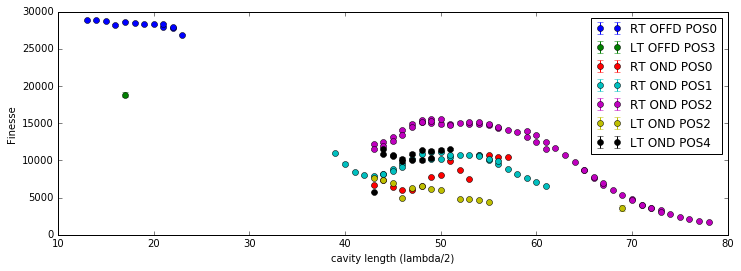

In [25]:
# plotting all in one figure
reload(funcs)
fig6,ax6 = plt.subplots(figsize=(12,4))
ax6  = funcs.plot_finesse_vs_length_from_avgs(RT_OFFD_POS0_avgs,RT_OFFD_POS0_Ns,ax=ax6,label='RT OFFD POS0')
ax6 = funcs.plot_finesse_vs_length(LT_OFFD_POS3_avg_array,LT_OFFD_POS3_u_avg_array,LT_OFFD_POS3_Ns,ax=ax6,label='LT OFFD POS3')

ax6 = funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS0_avgs,RT_OND_POS0_Ns,ax=ax6,label='RT OND POS0')
ax6 = funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS1_avgs,RT_OND_POS1_Ns,ax=ax6,label='RT OND POS1')
ax6 = funcs.plot_finesse_vs_length_from_avgs(RT_OND_POS2_avgs,RT_OND_POS2_Ns,ax=ax6,label='RT OND POS2')

ax6 = funcs.plot_finesse_vs_length(LT_OND_POS2_avg_array,LT_OND_POS2_u_avg_array,LT_OND_POS2_Ns,ax=ax6,label='LT OND POS2')
ax6 = funcs.plot_finesse_vs_length(LT_OND_POS4_avg_array,LT_OND_POS4_u_avg_array,LT_OND_POS4_Ns,ax=ax6,label='LT OND POS4')

#ax6.set_title(folder+'/Finesse_vs_L_all_OND')
#plt.savefig(os.path.join(folder,'Finesse_vs_L_all_OND_vs3.png'))
plt.show(fig6)

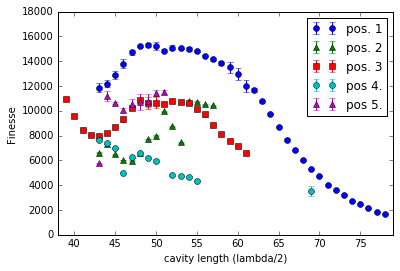

In [26]:
#use the averaged finesse per N, without x error +-1
reload(funcs)

fig4,ax4 = plt.subplots()

ax4 = funcs.plot_avgd_finesse_vs_length_from_avgs(RT_OND_POS2_avgs,RT_OND_POS2_Ns,ax=ax4,label='pos. 1',style='o',xerror=False)
ax4 = funcs.plot_avgd_finesse_vs_length_from_avgs(RT_OND_POS0_avgs,RT_OND_POS0_Ns,ax=ax4,label='pos. 2',style='^')
ax4 = funcs.plot_avgd_finesse_vs_length_from_avgs(RT_OND_POS1_avgs,RT_OND_POS1_Ns,ax=ax4,label='pos. 3',style='s')
ax4 = funcs.plot_avgd_finesse_vs_length(LT_OND_POS2_avg_array,LT_OND_POS2_u_avg_array,LT_OND_POS2_Ns,ax=ax4,label='pos 4.')
ax4 = funcs.plot_avgd_finesse_vs_length(LT_OND_POS4_avg_array,LT_OND_POS4_u_avg_array,LT_OND_POS4_Ns,ax=ax4,label='pos 5.',style='^')
ax4.set_xlim([38,79])
ax4.set_ylim(0,18000)
#ax2.set_title(folder+'/Finesse_vs_L_all_OND')
#plt.savefig(os.path.join(folder,'avgd_finesse_vs_L_all_OND_vs3-45.png'))
#plt.savefig(os.path.join(folder,'avgd_finesse_vs_L_all_OND_vs3-45.eps'))

plt.show(fig4)

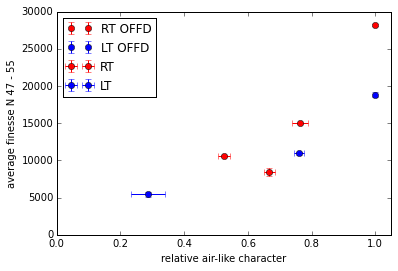

In [8]:
reload(funcs)
funcs.plot_finesse_vs_airlikecharacter((avg_finesse_RT_OFFD,u_avg_finesse_RT_OFFD),(avg_finesse_LT_OFFD,u_avg_finesse_LT_OFFD),
            (F_RT_POS0_N,u_F_RT_POS0_N),(F_RT_POS1_N, u_F_RT_POS1_N),(F_RT_POS2_N, u_F_RT_POS2_N),
            (F_LT_POS2_N, u_F_LT_POS2_N),(F_LT_POS4_N, u_F_LT_POS4_N),Ns)
#plt.savefig('K:/ns\qt\Diamond\Projects\Cavities\Cavity characterisation paper\data\data_for_cav_char_paper/finesse_vs_airmodeness.png')
#plt.savefig('K:/ns\qt\Diamond\Projets\Cavities\Cavity characterisation paper\data\data_for_cav_char_paper/finesse_vs_airmodeness.eps')
plt.show()
plt.close()

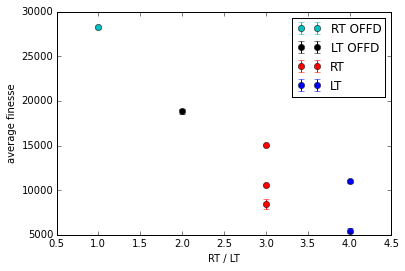

In [67]:
#plt average Finesse vs RT /  LT //  OFFD

RT_finesses = np.array([F_RT_POS0_N,F_RT_POS1_N,F_RT_POS2_N])
u_RT_finesses = np.array([u_F_RT_POS0_N,u_F_RT_POS1_N,u_F_RT_POS2_N])

LT_finesses = np.array([F_LT_POS2_N,F_LT_POS4_N])
u_LT_finesses = np.array([u_F_LT_POS2_N,u_F_LT_POS4_N])

fig,ax = plt.subplots()
ax.errorbar([1],[avg_finesse_RT_OFFD],yerr=[u_avg_finesse_RT_OFFD],fmt='co',label='RT OFFD')
ax.errorbar([2],[avg_finesse_LT_OFFD],yerr=[u_avg_finesse_LT_OFFD],fmt='ko',label='LT OFFD')
ax.errorbar([3,3,3],RT_finesses,yerr=u_RT_finesses,fmt='ro',label='RT')
ax.errorbar([4,4],LT_finesses,yerr=u_LT_finesses,fmt='bo',label='LT')

ax.set_xlim([0.5,4.5])
ax.legend(loc='upper right')
ax.set_ylabel('average finesse')
ax.set_xlabel('RT / LT')
#plt.savefig('K:/ns\qt\Diamond\Projects\Cavities\Cavity characterisation paper\data/data_for_cav_char_paper/finesse_vs_LT_RT_OFFD_OND.png')
#plt.savefig('K:/ns\qt\Diamond\Projects\Cavities\Cavity characterisation paper\data/data_for_cav_char_paper/finesse_vs_LT_RT_OFFD_OND.eps')

Converged with chi squared  25526612.289
degrees of freedom, dof  34
RMS of residuals (i.e. sqrt(chisq/dof))  866.477186302
Reduced chisq (i.e. variance of residuals)  750782.714382

fitted parameters at minimum, with 68% C.I.:
 0 ROC           16.753026 +/-   0.850752
 1 Z              1.502666 +/-   0.154027

correlation matrix:
               ROC       Z         
       ROC  1.000000
         Z -0.996219  1.000000

{'fitfunc': <function fitfunc at 0x000000000DD4B7B8>, 'dof': 34, 'residuals_rms': 866.47718630216639, 'chisq': 25526612.288992055, 'params_dict': {'Z': 1.5026661388086264, 'ROC': 16.753026266449819}, 'error_dict': {'Z': 0.15402664123677021, 'ROC': 0.85075246294155249}, 'success': 1, 'cov': array([[  9.64033587e-07,  -1.73875943e-07],
       [ -1.73875943e-07,   3.15992973e-08]]), 'fitfunc_str': '', 'reduced_chisq': 750782.71438211924, 'p0': [<analysis.lib.fitting.fit.Parameter instance at 0x0000000010740988>, <analysis.lib.fitting.fit.Parameter instance at 0x0000000010740

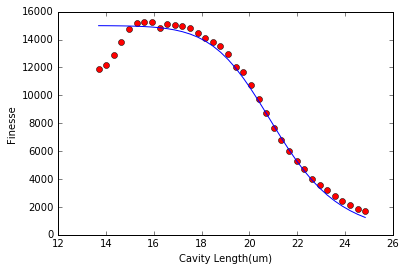

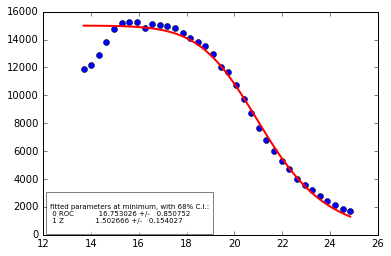

In [166]:
#Cavity clipping loss fit
reload(funcs)

averaged_finesse,u_averaged_finesse,range_Ns = funcs.get_averaged_finesses(RT_OND_POS2_avgs[:,4],RT_OND_POS2_avgs[:,5],RT_OND_POS2_Ns)

cavity_length = 1e6*637e-9*range_Ns/2

from analysis.lib.fitting import fit, common
#def fit_clipping_radius(g_ROC,g_Z,g_w0):
def fit_clipping_radius(g_ROC,g_Z):

    fitfunc_str = '2*np.pi/(433e-6+np.exp(-4*ROC()*Z()/(637e-9/3.14*(x*ROC()/2)**0.5*(1+x/2/ROC()))))'
    
    ROC = fit.Parameter(g_ROC, 'ROC')
    Z = fit.Parameter(g_Z, 'Z')
    #w0 = fit.Parameter(g_w0, 'w0')

#Check if you want to fit w0
    
    #p0 = [ROC,Z,w0]
    p0 = [ROC,Z]

#Different fitting models    
    
    def fitfunc(x):
        #For symmetric cavity, from Hunger:
        #return 2*np.pi/(419e-6+np.exp(-4*ROC()*Z()/(1e6*x*637e-9/np.pi*(1/(1-(1-x/ROC())**2))**0.5)))
        
        #For asymmetric cavity:
        #return 2*np.pi/(419e-6+np.exp(-4*ROC()*Z()/(637e-9/np.pi*np.sqrt(x*(ROC()-x))*(1+(637e-9*x/np.pi*(637e-9/np.pi*np.sqrt(x*(ROC()-x)))**2)))))
    
        #For large cavity, w0 is fitted
        #return 2*np.pi/(419e-6+np.exp(-4*ROC()*Z()/(w0()**2+(637e-9*x/np.pi/w0())**2)))
    
        #For large, symmetric cavity, w0 from formula

        w0 = np.sqrt(1e6*637e-9/2/np.pi*np.sqrt(x*(2*ROC()-x)))
        return 2*np.pi/(419e-6+np.exp(-4*ROC()*Z()/(w0**2*(1+(1e6*637e-9*x/np.pi/w0**2)**2))))
        #return 2*np.pi/(419e-6+np.exp(-4*ROC()*Z()/(637e-9*1e6/2/np.pi*(2*ROC()*x+3*x**2)/np.sqrt(x*(2*ROC()-x)))))
    
        #return 2*np.pi/(419e-6+np.exp(-4*ROC()*Z()/(1e6*637e-9*x/np.pi*np.sqrt(1/(1-(1-x/ROC())**2)))))
                                                                            
    return p0, fitfunc, fitfunc_str

#Guesses
p0, fitfunc, fitfunc_str = fit_clipping_radius(16.7,1.5)#,1.02e-6)

fig = plt.figure()
ax = plt.subplot(111)



ax.plot(cavity_length,averaged_finesse,'ro',label='data')
ax.plot(cavity_length, fitfunc(cavity_length),label = 'fit')

fit_result = fit.fit1d(cavity_length,averaged_finesse, None, p0=p0, fitfunc=fitfunc, do_print=True, ret=True, VERBOSE = True)
plot.plot_fit1d(fit_result)
ax.set_xlabel('Cavity Length(um)')
ax.set_ylabel('Finesse')

#ax.set_title('Title')
ax.set_xlabel('Cavity Length(um)')
ax.set_ylabel('Finesse')
print fit_result

plt.legend()

print fit_result['params_dict']['ROC']
print fit_result['params_dict']['Z']
#print fit_result['params_dict']['w0']


In [30]:
#Testing different formulas for cavity clipping loss fitting

x = 80*318.5e-9
Z = 1.5e-6
ROC = 18.3e-6
w0 = 1e-6
 

#sym
#y = 2*np.pi/(433e-6+np.exp(-4*ROC*Z/(x*637e-9/np.pi*(1/(x/ROC*(1-x/ROC)))**0.5)))
#print y

#r = 2*np.pi/(433e-6+np.exp(-4*ROC*Z/(637e-9/3.14*(x*ROC/2)**0.5*(1+2*x/ROC))))
r = 2*np.pi/(433e-6+np.exp(-4*ROC*Z/(637e-9/3.14*np.sqrt(x*ROC)*(1+2*x/ROC))))
print r
                          
#asym
t = 2*np.pi/(433e-6+np.exp(-4*ROC*Z/(637e-9/3.14*(x*ROC)**0.5*(1+x/4/ROC))))
print t

l = 2*np.pi/(433e-6+np.exp(-4*ROC*Z/(w0**2+(637e-9*x/np.pi/w0)**2)))
print l

k = 2*np.pi/(433e-6+np.exp(-4*ROC*Z/(637e-9*np.sqrt(x*ROC)/np.pi+(637e-9*x/np.pi)**2/(637e-9*np.sqrt(x*ROC)/np.pi))))
print k


3564.28287358
14510.5384971
323.880952611
13628.761427
